In [6]:
import pandas as pd
import os
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [7]:
return_data = pd.read_csv("../Data/ReportReturn.csv")
# 定义年报文本文件所在目录
report_directory = '../Data/FilteredReports'

# 初始化一个新的列，用于存储文本内容
return_data['text'] = None

# 遍历DataFrame的每一行
for index, row in return_data.iterrows():
    # 根据pdf文件名生成对应的txt文件名
    report_name_pdf = row['report']
    report_name_txt = report_name_pdf.replace('.pdf', '.txt')
    
    # 构建txt文件的完整路径
    file_path = os.path.join(report_directory, report_name_txt)
    
    # 检查文件是否存在
    if os.path.exists(file_path):
        # 读取文件内容
        with open(file_path, 'r', encoding='utf-8') as file:
            text = file.read()
        
        # 将文本内容添加到DataFrame对应行
        return_data.at[index, 'text'] = text
    else:
        print(f"File not found: {file_path}")

# 查看结果
return_data.head()

,code,report,rtn1y,rtn2y,text
0,1,000001_平安银行_2020年年度报告.pdf,-0.132696,-0.176295,平安 银行 股份 有限公司 年 年度报告 重要 提示 平安 银行 股份 有限公司 年 年度报...
1,1,000001_平安银行_2021年年度报告.pdf,-0.176295,-0.241602,平安 银行 股份 有限公司 年 年度报告 重要 提示 平安 银行 股份 有限公司 年 年度报...
2,2,000002_万科A_2020年年度报告.pdf,-0.221323,-0.021555,万科 企业 股份 有限公司 年度报告 证券 代码 证券 简称 万科 万科 代 公告 编号 万...
3,2,000002_万科A_2021年年度报告.pdf,-0.021555,-0.266972,万科 企业 股份 有限公司 年度报告 证券 代码 证券 简称 万科 万科 代 公告 编号 万...
4,63,000063_中兴通讯_2020年年度报告.pdf,0.001382,-0.210217,二 二年 年度报告 全文 中兴通讯 股份 有限公司 中兴通讯 股份 有限公司 二 二年 年度...


In [8]:
# 使用CountVectorizer将文本转换为词袋模型（词频表示）
vectorizer = CountVectorizer(max_features=1000)  # 选择最大特征数量为1000
X = vectorizer.fit_transform(return_data['text'].fillna(''))

# 将特征矩阵转换为数组格式，并准备目标变量y
X = X.toarray()
y = return_data['rtn1y'].values  # 假设我们预测一年收益率

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 训练线性回归模型
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# 进行预测
y_pred = linear_model.predict(X_test)

# 计算均方误差
mse_countvectorizer = mean_squared_error(y_test, y_pred)
print(f"CountVectorizer Model MSE: {mse_countvectorizer}")


CountVectorizer Model MSE: 1.2824428321978307


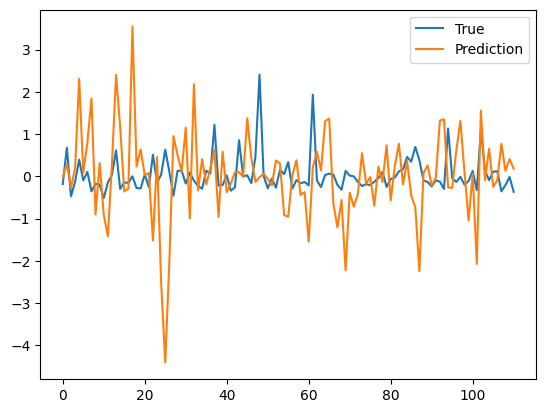

In [9]:
# 可视化结果
plt.plot(y_test, label='True')
plt.plot(y_pred, label='Prediction')
plt.legend()
plt.show()